<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">


---

# **Módulo 30** | Métodos hierárquicos de agrupamento 
Caderno de **exercício**<br>

# Tarefa 1

Discente: Samuel Saturno

## Importando as bibliotecas 

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [4]:
# Carrega o conjunto de dados "pinguins" com a função load_dataset
df = sns.load_dataset('penguins')

# Define o nome do indíce do Dataframe com "id"
df.index.name='id'

# Seleciona as colunas com dados numéricos e usando o dropna para remover (NaN)
df_num = df.select_dtypes(include='number').dropna()

## Visualização dos gráficos 

/home/sos/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


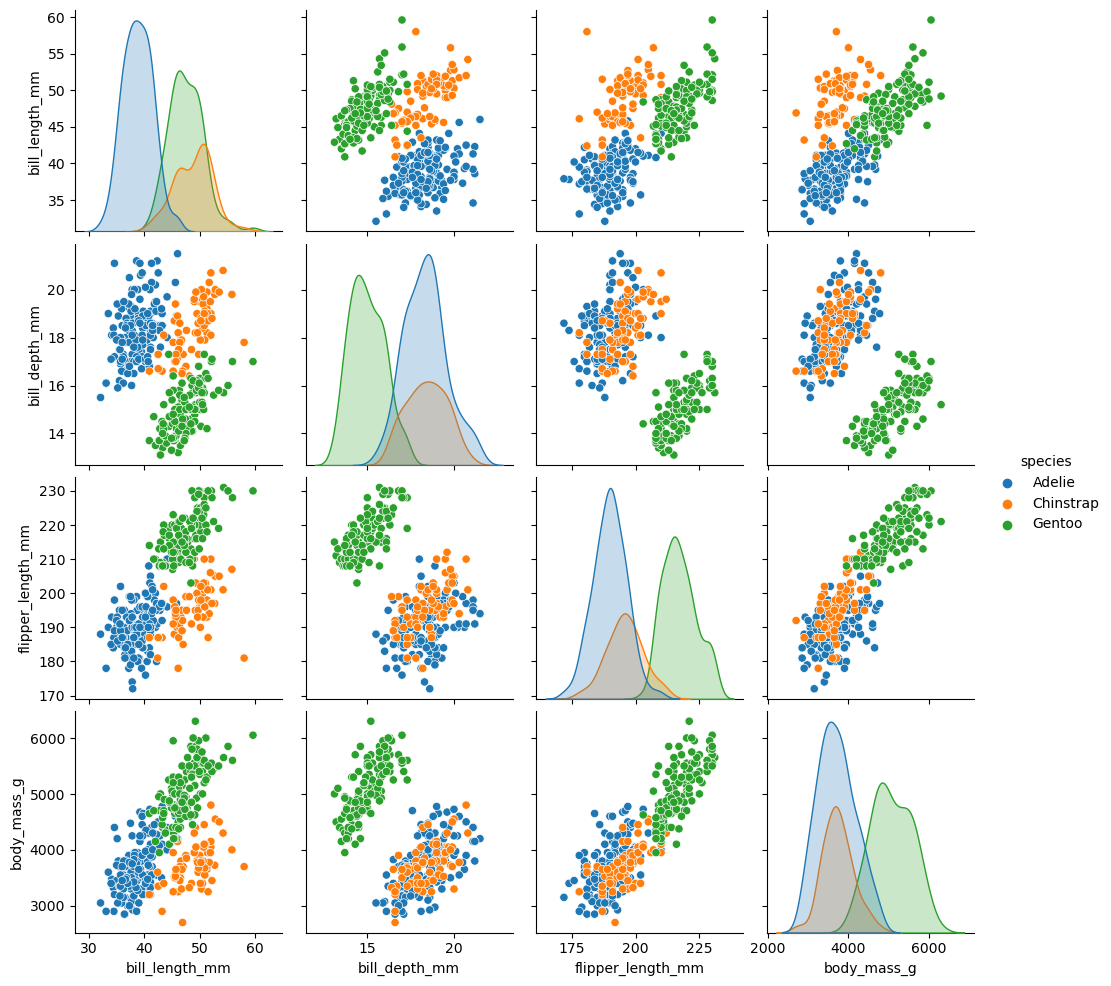

In [5]:
# Visualização dos dados 
sns.pairplot(data=df, hue='species')

## Padronização dos dados 

In [11]:
padronizador = StandardScaler()
df_pad = padronizador.fit_transform(df_num)

In [10]:
df_clust = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)

## Treinar o algoritmo 

In [19]:
df_clust.fit(df_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

## Base original rotulada 

In [18]:
df_num['grupo'] = df_clust.labels_
df_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [17]:
# Aplicando a função merge para juntar as colunas 
df = df.merge(df_num['grupo'], how='left', on='id')

# exibir os dataframe
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo_x,grupo_y,grupo
id,,,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,1.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,1.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,1.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,1.0,1.0


## Visualização dos grupos 

/home/sos/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


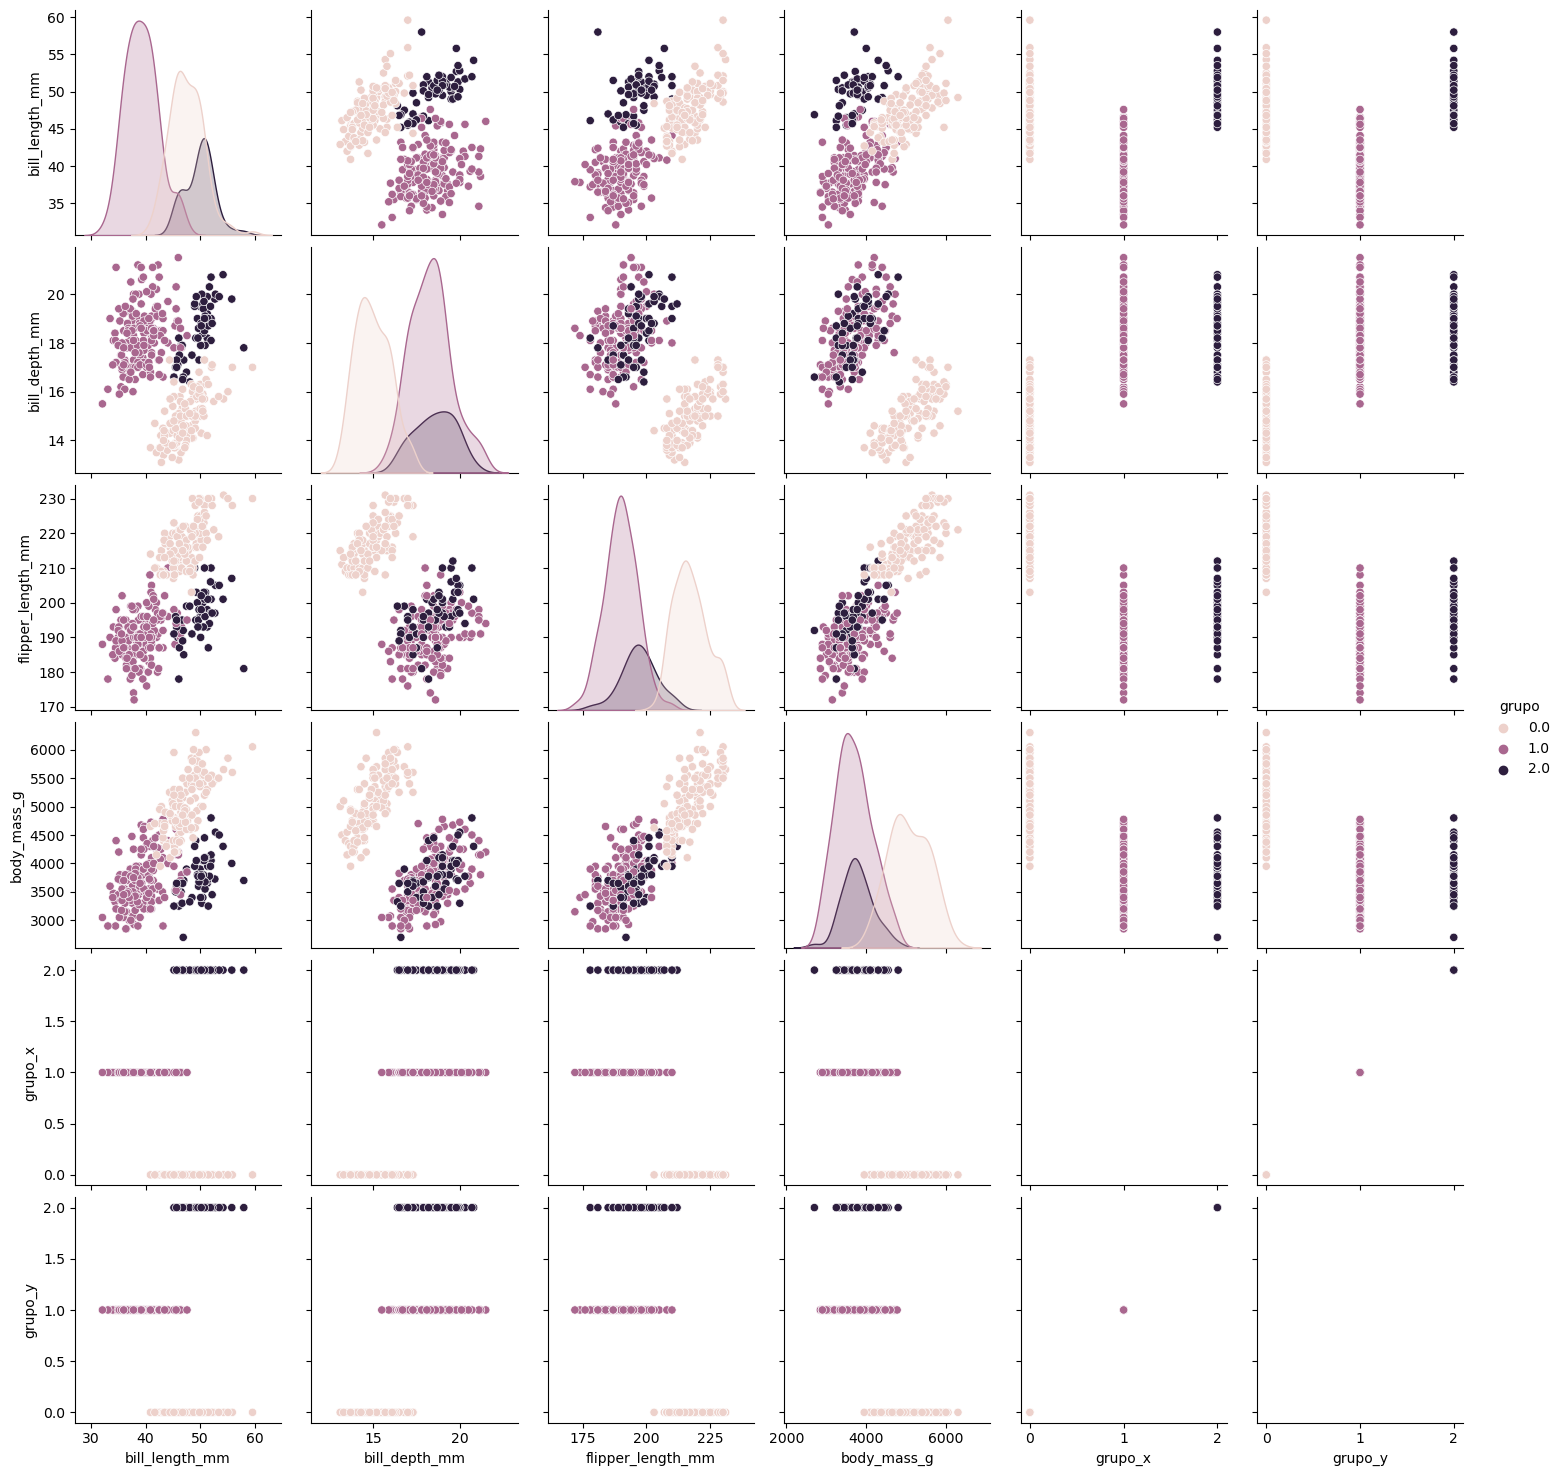

In [20]:
sns.pairplot(data=df, hue='grupo')

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

Quantidade de pinguins por espécie em cada grupo:
species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64

Descrição das variáveis quantitativas por grupo:
          bill_length_mm                                                   \
                   count       mean       std   min    25%    50%     75%   
species                                                                     
Adelie             151.0  38.791391  2.663405  32.1  36.75  38.80  40.750   
Chinstrap           68.0  48.833824  3.339256  40.9  46.35  49.55  51.075   
Gentoo             123.0  47.504878  3.081857  40.9  45.30  47.30  49.550   

                bill_depth_mm             ... grupo_y       grupo            \
            max         count       mean  ...     75%  max  count      mean   
species                                   ...                                 
Adelie     46.0         151.0  18.346358  ...     1.0  1.0  151.0  1.000000   
Chinstrap  58.0          68.0  18.420588  ...    

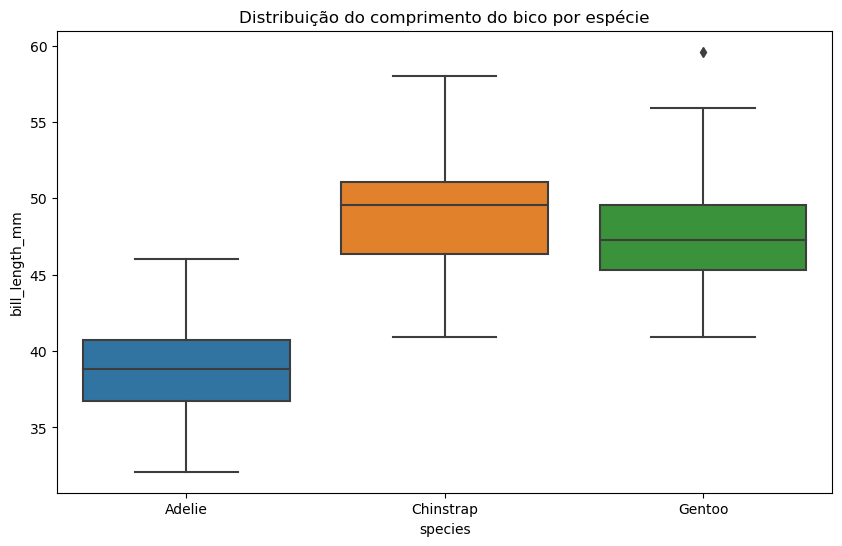

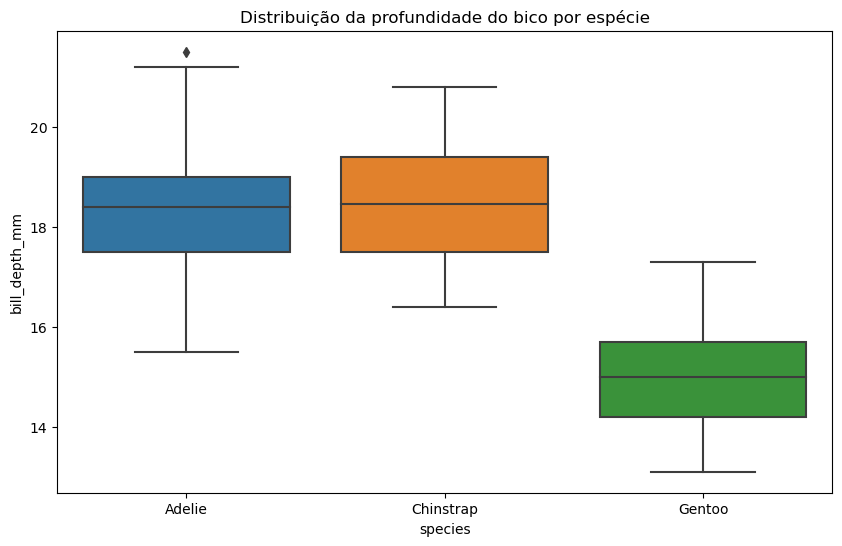

In [22]:
# 1. Contagem de pinguins por espécie em cada grupo
grouped = df.groupby(['species']).size()
print("Quantidade de pinguins por espécie em cada grupo:")
print(grouped)

# 2. Descrição das variáveis quantitativas por grupo
grouped_stats = df.groupby(['species']).describe()
print("\nDescrição das variáveis quantitativas por grupo:")
print(grouped_stats)

# Vaoms visualizar algumas estatísticas usando boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='bill_length_mm', data=df)
plt.title('Distribuição do comprimento do bico por espécie')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='bill_depth_mm', data=df)
plt.title('Distribuição da profundidade do bico por espécie')
plt.show()


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

## Visualização do Dataframe

In [41]:
# Exibir dataframe
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo_x,grupo_y,grupo
id,,,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,1.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,1.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,1.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,1.0,1.0


In [39]:
# Exibir os dados padronizados 
print(df_pad[:5])

[[-0.88449874  0.78544923 -1.41834665 -0.56414208]
 [-0.81112573  0.1261879  -1.06225022 -0.50170305]
 [-0.66437972  0.43046236 -0.42127665 -1.18853234]
 [-1.32473679  1.08972369 -0.56371522 -0.93877623]
 [-0.84781224  1.74898502 -0.77737308 -0.68902013]]


/home/sos/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


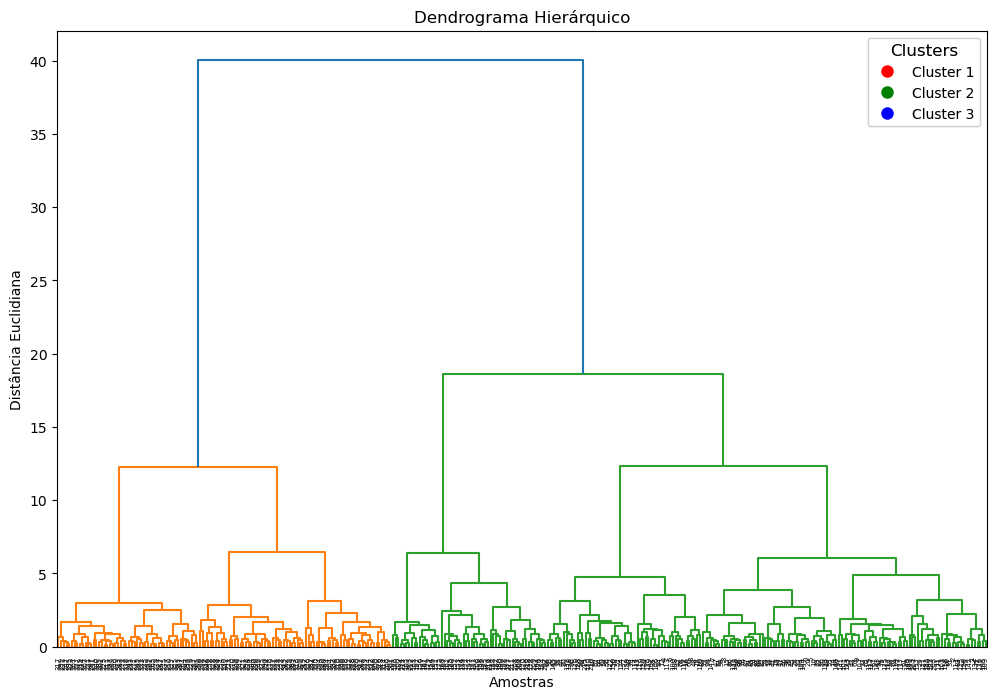

In [44]:
# Realiza o agrupamento hierárquico
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(df_pad)

# Plotagem do dendrograma
plt.figure(figsize=(12, 8))
plt.title("Dendrograma Hierárquico")
dendrogram = shc.dendrogram(shc.linkage(df_pad, method='ward'))

# Adiciona a legenda das cores
colors = ['r', 'g', 'b',]  # Cores correspondentes aos clusters
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']  # Rótulos dos clusters

# Cria a legenda
legend = plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(colors, labels)],
                    title='Clusters',
                    loc='upper right',
                    fontsize='medium',
                    title_fontsize='large')
plt.gca().add_artist(legend)  # Adiciona a legenda ao gráfico

# Exibe o dendrograma com a legenda
plt.xlabel('Amostras')
plt.ylabel('Distância Euclidiana')
plt.show()
